In [48]:
import pandas as pd 
from datasets import Dataset, Audio, Features

In [51]:
metadata = pd.read_csv('data/metadata/metadata_na_1k.csv', index_col='id')


In [52]:
metadata["file_name"].iloc[0]

'data/xeno-canto/north_america/campylorhynchus_brunneicapillus/XC241017.ogg'

In [53]:
metadata

,lat,lng,type,sex,primary,continent,secondary,file_name,ebird_code
id,,,,,,,,,
241017,31.4312,-110.2366,song,NaN,campylorhynchus brunneicapillus,North America,"['Zenaida asiatica', 'Haemorhous mexicanus', '...",data/xeno-canto/north_america/campylorhynchus_...,cacwre
741556,17.8693,-97.0266,song,NaN,vireo hypochryseus,North America,[],data/xeno-canto/north_america/vireo_hypochryse...,golvir1
796595,43.0706,-76.0712,call,uncertain,corvus brachyrhynchos,North America,[],data/xeno-canto/north_america/corvus_brachyrhy...,amecro
796809,17.1543,-88.8522,song,NaN,cyanoloxia cyanoides,North America,[],data/xeno-canto/north_america/cyanoloxia_cyano...,bubgro1
236014,29.7599,-95.4468,song,NaN,thryothorus ludovicianus,North America,[],data/xeno-canto/north_america/thryothorus_ludo...,carwre
...,...,...,...,...,...,...,...,...,...
483029,44.7233,-69.8220,song,NaN,toxostoma rufum,North America,[],data/xeno-canto/north_america/toxostoma_rufum/...,brnthr
52444,44.3670,-71.5270,song,NaN,geothlypis philadelphia,North America,"['Vireo solitarius', 'Geothlypis trichas', 'Le...",data/xeno-canto/north_america/geothlypis_phila...,mouwar
614146,15.6690,-96.5732,call,male,cassiculus melanicterus,North America,[],data/xeno-canto/north_america/cassiculus_melan...,yewcac1


In [99]:
na1k = Dataset.from_pandas(metadata)

In [77]:
file_column = na1k["file_name"]

In [103]:
na1k = na1k.add_column("file", na1k["file_name"])

In [104]:
na1k

Dataset({
    features: ['lat', 'lng', 'type', 'sex', 'primary', 'continent', 'secondary', 'file_name', 'ebird_code', 'id', 'file'],
    num_rows: 1000
})

In [79]:
na1k = na1k.rename_column("file_name", "audio")

In [80]:
# decode can be set True or False 
na1k = na1k.cast_column(
    column="audio", 
    feature= Audio(
            sampling_rate=16_000,
            mono=True,
            decode=True
    )
)

In [81]:
na1k[0]

{'lat': 31.4312,
 'lng': -110.2366,
 'type': 'song',
 'sex': None,
 'primary': 'campylorhynchus brunneicapillus',
 'continent': 'North America',
 'secondary': "['Zenaida asiatica', 'Haemorhous mexicanus', 'Streptopelia decaocto', 'Callipepla gambelii']",
 'audio': {'path': 'data/xeno-canto/NA_subset1k/XC241017.mp3',
  'array': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -2.55924442e-06, -2.74799049e-06,  0.00000000e+00]),
  'sampling_rate': 16000},
 'ebird_code': 'cacwre',
 'id': 241017}

In [10]:
from collections import Counter

print(f"Number of samples: {len(na1k['id'])}")
birds = Counter(na1k['ebird_code'])
print(f"Number of classes: {len(birds)}")
print(birds)

Number of samples: 1000
Number of classes: 514
Counter({None: 24, 'houwre': 10, 'sonspa': 9, 'rewbla': 9, 'marwre': 8, 'brncre': 8, 'comyel': 8, 'swathr': 8, 'amerob': 8, 'carwre': 7, 'purmar': 7, 'whtspa': 7, 'tuftit': 7, 'gnttow': 7, 'comrav': 7, 'wesmea': 7, 'nswowl': 7, 'savspa': 6, 'bewwre': 6, 'eastow': 6, 'spotow': 6, 'blujay': 6, 'gockin': 6, 'hoowar': 6, 'foxspa': 6, 'amecro': 5, 'grcfly': 5, 'bknsti': 5, 'wlswar': 5, 'brdowl': 5, 'rubcha1': 5, 'stejay': 5, 'brthum': 5, 'norcar': 5, 'norpar': 5, 'whcspa': 5, 'mouwar': 5, 'bubgro1': 4, 'macwar': 4, 'norwat': 4, 'chispa': 4, 'redcro': 4, 'belvir': 4, 'sumtan': 4, 'chswar': 4, 'cubthr': 4, 'balori': 4, 'bktspa': 4, 'virrai': 4, 'btywar': 4, 'annhum': 4, 'ridrai1': 4, 'daejun': 4, 'lazbun': 4, 'veery': 4, 'acafly': 4, 'yebcuc': 4, 'bkcchi': 4, 'woothr': 3, 'grhowl': 3, 'spwqua1': 3, 'winwre3': 3, 'whbeme1': 3, 'rebwoo': 3, 'orcwar': 3, 'mewgul2': 3, 'ovenbi1': 3, 'ruckin': 3, 'sora': 3, 'magwar': 3, 'nrwswa': 3, 'eletro': 3, 'acow

In [38]:
from huggingface_hub import login

login()

In [16]:
na1k.push_to_hub(
    repo_id="DBD-research-group/xeno-canto_na_1k_nodecode",
    private=True,
    embed_external_files=True
)

# took ~45 minutes

Exception ignored in: <function Dataset.__del__ at 0x7f1cf8404d30>
Traceback (most recent call last):
  File "/home/lukas/miniconda3/envs/dal-toolbox/lib/python3.9/site-packages/datasets/arrow_dataset.py", line 1339, in __del__
    def __del__(self):
KeyboardInterrupt: 


Map:   0%|          | 0/250 [00:00<?, ? examples/s]

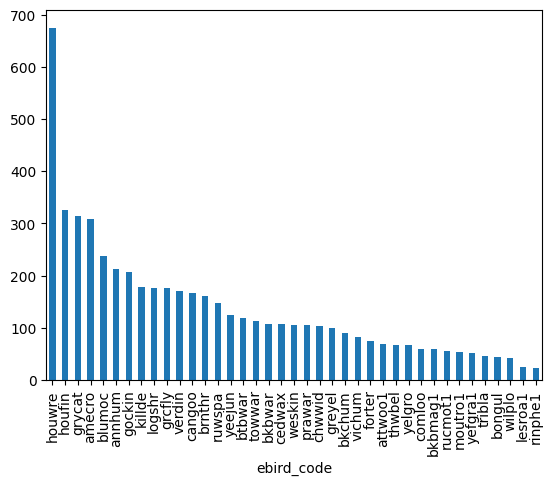

In [39]:
import matplotlib.pyplot as plt 
value_counts = metadata['ebird_code'].value_counts()
value_counts.plot(kind='bar')
plt.show()

In [60]:
import matplotlib.pyplot as plt 
value_counts = metadata['primary'].value_counts()
value_counts.plot(kind='bar')
plt.show()

In [86]:
test = na1k.class_encode_column('primary')

Casting to class labels:   0%|          | 0/5396 [00:00<?, ? examples/s]

In [89]:
birds = Counter(test['primary'])
print(f"Number of classes: {len(birds)}")
print(birds)

Number of classes: 40
Counter({37: 675, 15: 325, 12: 315, 11: 308, 19: 237, 6: 213, 28: 206, 8: 178, 21: 176, 17: 176, 3: 170, 5: 167, 35: 160, 22: 147, 16: 124, 29: 118, 32: 113, 4: 107, 31: 107, 39: 106, 30: 105, 1: 103, 36: 99, 2: 89, 18: 83, 33: 74, 26: 69, 27: 67, 24: 66, 13: 60, 25: 59, 7: 57, 20: 55, 38: 54, 34: 52, 0: 45, 10: 43, 9: 42, 14: 24, 23: 22})


In [91]:
na5k_split = na1k.class_encode_column('primary').train_test_split(test_size=0.2, stratify_by_column='primary')

Casting to class labels:   0%|          | 0/5396 [00:00<?, ? examples/s]

In [99]:
na5k_split["train"].features

{'lat': Value(dtype='float64', id=None),
 'lng': Value(dtype='float64', id=None),
 'type': Value(dtype='string', id=None),
 'sex': Value(dtype='string', id=None),
 'primary': ClassLabel(names=['agelaius tricolor', 'antrostomus carolinensis', 'archilochus alexandri', 'auriparus flaviceps', 'bombycilla cedrorum', 'branta canadensis', 'calypte anna', 'campylorhynchus capistratus', 'charadrius vociferus', 'charadrius wilsonia', 'chroicocephalus philadelphia', 'corvus brachyrhynchos', 'dumetella carolinensis', 'gavia immer', 'geococcyx velox', 'haemorhous mexicanus', 'junco phaeonotus', 'lanius ludovicianus', 'leucolia violiceps', 'melanotis caerulescens', 'momotus mexicanus', 'myiarchus crinitus', 'peucaea carpalis', 'phasianus colchicus', 'pheucticus chrysopeplus', 'pica hudsonia', 'picoides dorsalis', 'procnias tricarunculatus', 'regulus satrapa', 'setophaga caerulescens', 'setophaga discolor', 'setophaga fusca', 'setophaga townsendi', 'sterna forsteri', 'tiaris olivaceus', 'toxostoma ru

In [108]:
na5k_split["train"].features["primary"].int2str(2)

'archilochus alexandri'

Set Tranform vs Cast Column 